In [16]:
from scvi.dataset import LoomDataset, CsvDataset, Dataset10X, AnnDataset
import urllib.request
import os

In [17]:
tenx = CsvDataset("CellBench_sce10x_qc.csv.gz", save_path="data/", compression="gzip", new_n_genes=600)

File data/CellBench_sce10x_qc.csv.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
Downsampling from 16468 to 600 genes
Downsampling from 902 to 902 cells


In [18]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
from scvi.models import *
from scvi.inference import UnsupervisedTrainer

In [30]:
n_epochs_all = None
save_path = 'data/'
n_epochs=400 if n_epochs_all is None else n_epochs_all
lr=1e-2
use_batches=False
use_cuda=False

In [31]:
vae = VAE(tenx.nb_genes, n_batch=tenx.n_batches * use_batches)
trainer = UnsupervisedTrainer(vae,
                              tenx,
                              train_size=0.75,
                              use_cuda=use_cuda,
                              frequency=5)
trainer.train(n_epochs=n_epochs, lr=lr)

training: 100%|██████████| 400/400 [01:37<00:00,  3.31it/s]


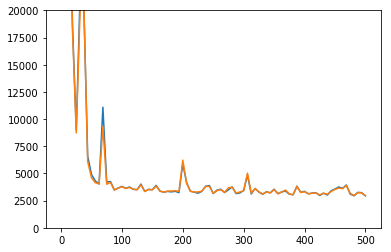

In [33]:
ll_train_set = trainer.history["ll_train_set"]
ll_test_set = trainer.history["ll_test_set"]
x = np.linspace(0,500,(len(ll_train_set)))
plt.plot(x, ll_train_set)
plt.plot(x, ll_test_set)
plt.ylim(0,20000)
plt.show()

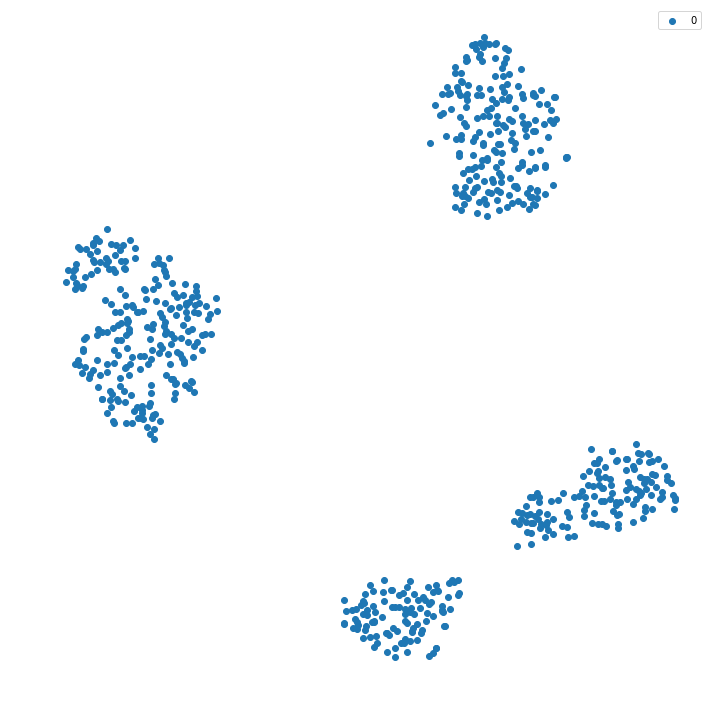

In [34]:
n_samples_tsne = 1000
trainer.train_set.show_t_sne(n_samples=n_samples_tsne, color_by='labels')

In [23]:
import pandas as pd
labels = pd.read_csv("data/CellBench_sce10x_qc_cols.csv.gz", header=0, index_col=0)

In [24]:
labels

,unaligned,aligned_unmapped,mapped_to_exon,mapped_to_intron,ambiguous_mapping,mapped_to_ERCC,mapped_to_MT,number_of_genes,total_count_per_cell,non_mt_percent,non_ribo_percent,outliers,cell_line
CELL_000001,167234,8341,526950,40991,21392,0,22342,11237,266880,0.823985,0.797096,False,HCC827
CELL_000002,171821,10047,513676,41809,23139,0,15065,11759,249152,0.823525,0.787884,False,H1975
CELL_000003,174510,8608,513021,42270,20170,0,20943,11203,251204,0.828956,0.801715,False,HCC827
CELL_000004,158346,7796,504676,39684,18628,0,14021,11237,250040,0.839618,0.816149,False,HCC827
CELL_000005,159070,6968,486645,38252,20029,0,14100,10920,244441,0.838746,0.798577,False,HCC827
CELL_000006,144914,8610,465126,33435,21732,0,11855,11157,235288,0.817904,0.788378,False,H1975
CELL_000007,151566,7854,462366,32460,17358,0,13978,11061,233424,0.842253,0.796229,False,HCC827
CELL_000008,149137,6321,459096,29215,18723,0,14776,10744,228662,0.832810,0.790026,False,HCC827
CELL_000009,142936,7756,453356,37640,17539,0,13969,10869,223177,0.841583,0.818400,False,HCC827
CELL_000010,146525,9286,441443,46646,16196,0,13008,11129,219001,0.848279,0.821307,False,HCC827


In [25]:
labels.values

array([[167234, 8341, 526950, ..., 0.7970960432742791, False, 'HCC827'],
       [171821, 10047, 513676, ..., 0.787884472615734, False, 'H1975'],
       [174510, 8608, 513021, ..., 0.8017149089299971, False, 'HCC827'],
       ...,
       [35066, 2039, 105214, ..., 0.834845609146753, False, 'H2228'],
       [33183, 3061, 84351, ..., 0.796159582810046, False, 'HCC827'],
       [35006, 1634, 81662, ..., 0.791888169452489, False, 'HCC827']],
      dtype=object)

In [26]:
cell_types = np.unique(labels)

TypeError: '<' not supported between instances of 'str' and 'int'

In [35]:
dir(trainer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_posteriors',
 'benchmark',
 'compute_metrics',
 'compute_metrics_time',
 'corrupt_posteriors',
 'create_posterior',
 'data_loader_kwargs',
 'data_loaders_loop',
 'default_metrics_to_monitor',
 'early_stopping',
 'epoch',
 'frequency',
 'gene_dataset',
 'get_all_latent_and_imputed_values',
 'history',
 'kl',
 'kl_weight',
 'loss',
 'metrics_to_monitor',
 'model',
 'n_epochs',
 'on_epoch_begin',
 'on_epoch_end',
 'optimizer',
 'posteriors_loop',
 'register_posterior',
 'train',
 'train_test',
 'training_time',
 'uncorrupt_posteriors',
 'use_cuda',
 'verbose',
 'weight_decay']

In [36]:
dir(vae)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backend',
 '_backward_hooks',
 '_buffers',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_parameters',
 '_reconstruction_loss',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_slow_forward',
 '_state_dict_hooks',
 '_tracing_name',
 '_version',
 'add_module',
 'apply',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'decoder',
 'dispersion',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'get_latents',
 'get_sample_rate

In [38]:
help(vae.state_dict)

Help on method state_dict in module torch.nn.modules.module:

state_dict(destination=None, prefix='', keep_vars=False) method of scvi.models.vae.VAE instance
    Returns a dictionary containing a whole state of the module.
    
    Both parameters and persistent buffers (e.g. running averages) are
    included. Keys are corresponding parameter and buffer names.
    
    Returns:
        dict:
            a dictionary containing a whole state of the module
    
    Example::
    
        >>> module.state_dict().keys()
        ['bias', 'weight']



In [41]:
final_state = vae.state_dict()

In [44]:
import torch
torch.save(final_state, "scvi-stuffnthings.pkl")
